### Group Project Classification System


# **Classification System**
**Kelompok:** 3

**Anggota:**
1. Galvin Shalahuddin Mumtaz - 24060124140162
2. Birela Miadeta Purita - 24060124120002
3. Rizky Saefirdaus - 24060124120001
4. Laurensius Brian Prayoga - 24060124130077

---
**Deskripsi Tugas:**
Eksplorasi data, preprocessing, pembuatan model klasifikasi, dan evaluasi untuk mendeteksi kerusakan mesin (*Fault Diagnosis*) berbasis data sensor IoT.

In [60]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [61]:
import os
datatrain_path = "./datatrain.csv"
if not os.path.exists("./datatrain.csv"):
   print("Dataset gk ada ")

datatrain = pd.read_csv(datatrain_path)
datatrain.head()



,Timestamp,Vibration_X,Vibration_Y,Vibration_Z,Acoustic_Level,Temperature,Fault_Type
0,2024-01-02 06:14:00,0.186573,0.193336,0.224626,24.762336,59.278761,Normal
1,2024-01-22 13:57:00,0.284977,0.321766,0.236176,30.514945,88.773213,Overheating
2,2024-01-16 07:11:00,0.471037,0.659048,0.406148,47.100926,66.414209,Imbalance
3,2024-01-13 23:41:00,0.437769,0.523685,0.299959,58.611390,69.998793,Imbalance
4,2024-01-04 01:53:00,0.171922,0.216380,0.105515,27.004190,62.480057,Normal


# 1. Exploratory Data Analysis (EDA)


Setelah kita melihat datatrain yang kita telah read dari `datatrain_path`, data tersebut memiliki struktur berupa:
- Timestamp `YYYY-MM-DD HH:MM:SS`
  1. Y = Year (tahun)
  2. Month (bulan)
  3. D = Day (hari)
  4. H = Hour (jam, format 24 jam)
  5. M = Minute (menit)
  6. S = Second (detik)

- `Vibration_X`, `Vibration_Y`, `Vibration_Z` adalah sensor getaran yang mengukur seberapa kuat getaran mesin dalam tiga arah:


  typedata: `float`
   1. X → arah horizontal
   2. Y → arah vertikal
   3. Z → arah kedalaman

    
- `Acoustic_Level` adalah Sensor suara/akustik, mengukur tingkat kebisingan mesin.

   typedata: `float`


- `Fault_Type` kondisi mesin saat data diambil.

  typedata: `string`

  dengan indikasi:

  
  `Normal` → mesin sehat

  `Overheating` → suhu terlalu panas

  `Bearing Fault` → kerusakan pada bearing

  `Imbalance` → ketidakseimbangan mekanis


kita bisa dengan mudah mengecek menggunakan
- `datatrain.info()` **(Melihat tipe data tiap kolom)**
- `datatrain.shape`  **( Melihat Jumlah Baris & Kolom)**
- `datatrain.describe()` (**Untuk melihat nilai min, max, mean, std, dll.**)
- `datatrain.isnull().sum()` (**Untuk cek missing values**)
- `datatrain[values].value_counts()` **(cek penyebaran data)**

#### 1. tipe data tiap kolom


In [62]:
datatrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25600 entries, 0 to 25599
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Timestamp       25600 non-null  object 
 1   Vibration_X     25600 non-null  float64
 2   Vibration_Y     25600 non-null  float64
 3   Vibration_Z     25600 non-null  float64
 4   Acoustic_Level  25600 non-null  float64
 5   Temperature     25600 non-null  float64
 6   Fault_Type      25600 non-null  object 
dtypes: float64(5), object(2)
memory usage: 1.4+ MB


#### 2.  Jumlah Baris & Kolom

In [63]:
datatrain.shape

(25600, 7)

terdapat `25600` data dengan 6 kolom

#### 3. melihat nilai min, max, mean, std, dll

In [64]:
datatrain.describe()

,Vibration_X,Vibration_Y,Vibration_Z,Acoustic_Level,Temperature
count,25600.000000,25600.000000,25600.000000,25600.000000,25600.000000
mean,0.449675,0.480375,0.419693,46.294651,72.491776
std,0.239924,0.257804,0.222938,17.157253,11.922005
min,0.015582,0.008167,0.017246,12.232175,51.068792
25%,0.250291,0.259807,0.239741,32.267526,62.233479
50%,0.382843,0.418194,0.349910,42.148973,69.552977
75%,0.622031,0.671945,0.570831,58.292535,80.820895
max,1.153653,1.224538,1.099511,105.360481,108.660532


1. rata-rata suhu dari 25600 data yang ada memiliki `72.491776` Celcius dan suhu tertinggi di `108.660532` Celcius dengan `51.068792` suhu terendah
2. Untuk Acoustic_Level dengan satuan (dB) dengan rata-rata `46.294651` dengan nilai tertinggi `105.360481`
   -> ada fakta bahwa ada mesin dengaan tingkat kebisingan 105 dB yang setara dengan suara mobil/motor didalam rumah sakit.

#### 4. Cek missing values

In [65]:
datatrain.isnull().sum()

Timestamp         0
Vibration_X       0
Vibration_Y       0
Vibration_Z       0
Acoustic_Level    0
Temperature       0
Fault_Type        0
dtype: int64

-> tidak ada missing values yang cukup baik dari ribuan dataset yang ada.

#### 5. Penyebaran data

In [66]:
datatrain["Fault_Type"].value_counts()

Fault_Type
Overheating      6412
Imbalance        6405
Normal           6398
Bearing Fault    6385
Name: count, dtype: int64

Dataset cukup seimbang yang cukup baik dapat mempengaruhi akurasi, precision, dan recall akan lebih stabil.

<Axes: >

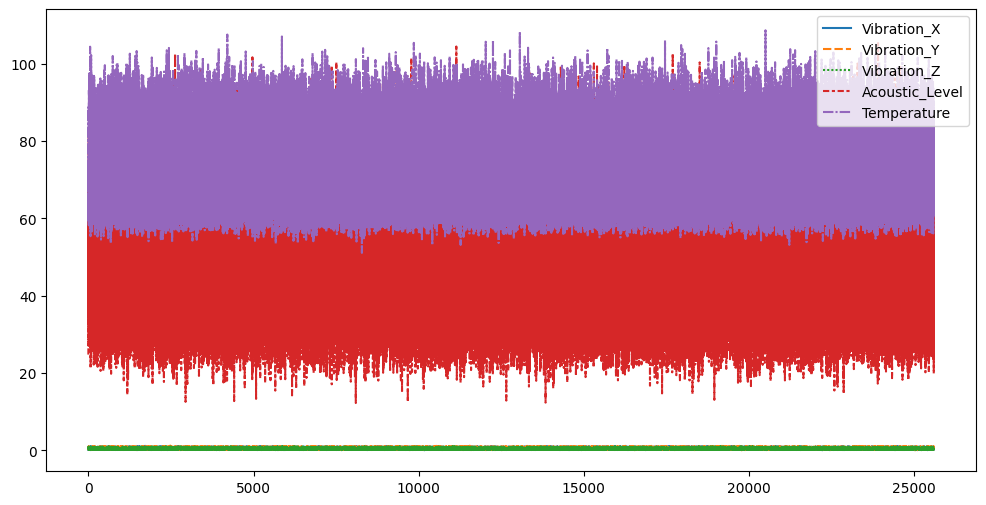

In [67]:

plt.figure(figsize=(12,6))
sns.lineplot(data=datatrain)

<Axes: >

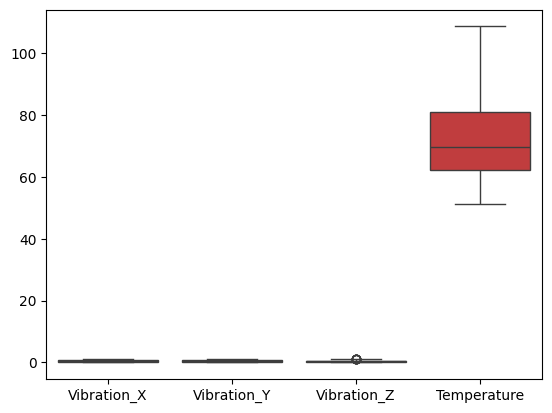

In [68]:
sns.boxplot(data=datatrain[['Vibration_X','Vibration_Y','Vibration_Z','Temperature']])

boxplot (Untuk melihat outlier):

# 2. Preprocessing


Preprocessing sendiri adalah tahap membersihkan dan menyiapkan data sebelum masuk ke model machine learning.

#### 1. Timestamp

Timestamp kita `2024-01-02 06:14:00` masih berbentuk string, maka harus diubah ke bentuk date

In [69]:
datatrain["Timestamp"] = pd.to_datetime(datatrain.Timestamp)


In [70]:
datatrain.Hour = datatrain['Timestamp'].dt.hour
datatrain.Minute = datatrain['Timestamp'].dt.minute
datatrain.Second = datatrain['Timestamp'].dt.second

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3100\383328787.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  datatrain.Hour = datatrain['Timestamp'].dt.hour
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3100\383328787.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  datatrain.Minute = datatrain['Timestamp'].dt.minute
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3100\383328787.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  datatrain.Second = datatrain['Timestamp'].dt.second


In [71]:
datatrain = datatrain.drop(columns = ['Timestamp'])

Model `ML` Tidak membutuhkan timestamp jadi kita eliminasi ditahap preprocessing ini.

#### 2. Encoding String



In [72]:
from sklearn.preprocessing import LabelEncoder

In [73]:
encode = LabelEncoder()
datatrain['Fault_Type_encoded'] = encode.fit_transform(datatrain['Fault_Type'])
datatrain[['Fault_Type','Fault_Type_encoded']].head()

,Fault_Type,Fault_Type_encoded
0,Normal,2
1,Overheating,3
2,Imbalance,1
3,Imbalance,1
4,Normal,2


`Fault_Type` akan kita ganti dari yang awalnya berbentuk string menjadi encoded, kita convert ke integer supaya ML bisa memahami lebih mudah.

In [74]:
datatrain

,Vibration_X,Vibration_Y,Vibration_Z,Acoustic_Level,Temperature,Fault_Type,Fault_Type_encoded
0,0.186573,0.193336,0.224626,24.762336,59.278761,Normal,2
1,0.284977,0.321766,0.236176,30.514945,88.773213,Overheating,3
2,0.471037,0.659048,0.406148,47.100926,66.414209,Imbalance,1
3,0.437769,0.523685,0.299959,58.611390,69.998793,Imbalance,1
4,0.171922,0.216380,0.105515,27.004190,62.480057,Normal,2
...,...,...,...,...,...,...,...
25595,0.417617,0.541475,0.584486,49.168698,65.474700,Imbalance,1
25596,0.664367,0.937601,0.766887,67.528950,74.150093,Bearing Fault,0
25597,0.214668,0.246899,0.274203,19.853259,60.354836,Normal,2
25598,0.234674,0.239059,0.222012,30.976802,61.449651,Normal,2


#### 3. Split data

kita akan bagi menjadi 2 bagian yaitu parameter input `(x)` dan parameter output `y`, parameter input `x` nanti akan kita train dengan 4 model berbeda supaya bisa menghasilkan output berupa `y`

In [75]:
from sklearn.model_selection import train_test_split

X = datatrain.drop(columns=['Fault_Type', 'Fault_Type_encoded'])
y = datatrain['Fault_Type_encoded']
y.head()
X.head()



,Vibration_X,Vibration_Y,Vibration_Z,Acoustic_Level,Temperature
0,0.186573,0.193336,0.224626,24.762336,59.278761
1,0.284977,0.321766,0.236176,30.514945,88.773213
2,0.471037,0.659048,0.406148,47.100926,66.414209
3,0.437769,0.523685,0.299959,58.611390,69.998793
4,0.171922,0.216380,0.105515,27.004190,62.480057



Kita akan memcah 2 data menjadi 2 bagian yaitu 

- Train_X, Train_Y → untuk melatih model

- Validation/Test → buat mengukur accuracy

**80%** data untuk training dan **20%** untuk cek akurasi dari data yang sudah kita train

In [76]:
Train_X, Val_X, Train_Y, Val_Y = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


#### 4. Scaling data

Scaling digunakan untuk menyamakan skala antar fitur agar algoritma machine learning dapat belajar lebih stabil, cepat, dan akurat.

StandardScaler digunakan untuk menstandarisasi fitur dengan mengubahnya agar memiliki mean = 0 dan standar deviasi = 1, menggunakan parameter yang dipelajari dari data training.

In [77]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Train_X_scaled = scaler.fit_transform(Train_X)
Val_X_scaled = scaler.transform(Val_X)



# 3. Modeling


Setelah memisahkan data yang dibutuhkan kita akan men-training data.
Kita menggunakan 4 model yang berbeda yaitu
-  RandomForest
-  SVM (Support Vector Machine)
-  XGBoost
-  KNN k-Nearest Neighbors


  yang nantinya model model tsb akan kita cek siapa yang memiliki akurasi terbaik.

In [78]:
import time
import pandas as pd
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [79]:
models = {
    "RandomForest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(eval_metric="logloss"),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
}


Variable `Train_X_scaled` yang sudah kita scale akan dimasukkan kedalam fungsi `model.fit` dengan parameter


```python
model.fit(X, y)
```

dengan X (data fitur / input),y (label / target output)

In [80]:
results = []

for name, model in models.items():
    print(f"Training {name}!")
    start = time.time()
    try:
        model.fit(Train_X_scaled, Train_Y)

        # Akurasi Training
        pred_train = model.predict(Train_X_scaled)
        acc_train = accuracy_score(Train_Y, pred_train)

        # Akurasi Validation
        pred_val = model.predict(Val_X_scaled)
        acc_val = accuracy_score(Val_Y, pred_val)

        elapsed = time.time() - start
        
        results.append({
            "Model": name,
            "Train Accuracy": acc_train,
            "Val Accuracy": acc_val,
            "Time (s)": elapsed
        })

        print(f"{name} | Train: {acc_train*100:.1f}% | Val: {acc_val*100:.1f}% | Time: {elapsed:.3f}s")

    except Exception as e:
        print(f"Error model {name}: {e}")

Training RandomForest!
RandomForest | Train: 100.0% | Val: 100.0% | Time: 6.047s
Training XGBoost!
XGBoost | Train: 100.0% | Val: 100.0% | Time: 0.655s
Training SVM!
SVM | Train: 100.0% | Val: 100.0% | Time: 1.168s
Training KNN!
KNN | Train: 100.0% | Val: 100.0% | Time: 2.270s


In [81]:
urutkan_model = pd.DataFrame(results)

In [82]:
urutkan_model

,Model,Train Accuracy,Val Accuracy,Time (s)
0,RandomForest,1.0,1.0,6.046526
1,XGBoost,1.0,1.0,0.654853
2,SVM,1.0,1.0,1.168465
3,KNN,1.0,1.0,2.269582


ternyata train accuracy dan val accuracy nya sama sama 100%, artinya tidak overfitting,

Overfitting diuji dengan membandingkan akurasi pada data training dan data validation; selisih yang besar menunjukkan indikasi overfitting.

#### 3.1. Model Validation

Setelah memiliki 4 model yang berbeda dengan akurasi 100%, kita akan test dengan data yang sudah ada jawaban nya (solution.csv)

In [83]:
import pandas as pd

solution_df = pd.read_csv("solution.csv")

In [84]:
kolom_yang_dibutuhkan = Train_X.columns 

In [85]:
X_solution = solution_df[kolom_yang_dibutuhkan]
X_solution_scaled = scaler.transform(X_solution)

In [86]:
solution_df["Prediction_randomForest"] = models["RandomForest"].predict(X_solution_scaled)
solution_df["Prediction_XGBoost"]	=  models["XGBoost"].predict(X_solution_scaled)
solution_df["Prediction_SVM"]	 = models["SVM"].predict(X_solution_scaled)
solution_df["Prediction_KNN"] = models["KNN"].predict(X_solution_scaled)

In [87]:
solution_df.head()

,Timestamp,Vibration_X,Vibration_Y,Vibration_Z,Acoustic_Level,Temperature,Fault_Type,Prediction_randomForest,Prediction_XGBoost,Prediction_SVM,Prediction_KNN
0,2024-01-03 16:35:00,0.259595,0.123741,0.278931,34.185115,56.147609,Normal,2,2,2,2
1,2024-01-03 19:15:00,0.247835,0.164334,0.192892,28.757117,58.822799,Normal,2,2,2,2
2,2024-01-14 16:05:00,0.594495,0.617636,0.447488,46.827427,60.612006,Imbalance,1,1,1,1
3,2024-01-13 01:38:00,0.644332,0.506017,0.440456,55.065405,66.081068,Imbalance,1,1,1,1
4,2024-01-12 09:02:00,0.619386,0.480183,0.488816,47.083296,64.132375,Imbalance,1,1,1,1


Setelah memasukkan semua prediction 4 model berbeda kita akan ganti fault_type menjadi sesuai encoding yang kita telah terapkan di awal, lalu kita akan cek apakah model-model tersebut dapat memprediksi.

In [88]:
label_map = {
    "Normal": 2,
    "Overheating": 3,
    "Imbalance": 1,
    "Bearing Fault": 0
}

In [89]:
solution_df["Fault_Encoded"] = solution_df["Fault_Type"].map(label_map)

kita delete kolom yang tidak terlalu dibutuhkan supayaa tidak pusing wkwk.

In [95]:
solution_df = solution_df.drop(columns=['Timestamp', 'Vibration_X', 'Vibration_Y', 'Vibration_Z', 'Acoustic_Level', 'Temperature', 'Fault_Type'])
solution_df

,Prediction_randomForest,Prediction_XGBoost,Prediction_SVM,Prediction_KNN,Fault_Encoded
0,2,2,2,2,2
1,2,2,2,2,2
2,1,1,1,1,1
3,1,1,1,1,1
4,1,1,1,1,1
...,...,...,...,...,...
6395,2,2,2,2,2
6396,3,3,3,3,3
6397,1,1,1,1,1
6398,0,0,0,0,0


In [ ]:
solution_df

#### 3.2. Cek akurasi model dengan data `solution.csv`

In [96]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [101]:
jawaban = solution_df["Fault_Encoded"]
akurasi_random_forest = accuracy_score(jawaban, solution_df["Prediction_randomForest"])
akurasi_XGBoost = accuracy_score(jawaban, solution_df["Prediction_XGBoost"])
akurasi_SVM = accuracy_score(jawaban, solution_df["Prediction_SVM"])
akurasi_KNN = accuracy_score(jawaban, solution_df["Prediction_KNN"])

## 4. Model Evaluation

In [104]:
print("=== Akurasi Model ===")
print(f"Random Forest : {akurasi_random_forest}")
print(f"XGBoost       : {akurasi_XGBoost}")
print(f"SVM           : {akurasi_SVM}")
print(f"KNN           : {akurasi_KNN}")

=== Akurasi Model ===
Random Forest : 0.99984375
XGBoost       : 0.99984375
SVM           : 1.0
KNN           : 0.99953125


Support Vector Machine (SVM) menunjukkan performa terbaik dengan akurasi 100%, menandakan bahwa model ini mampu mengklasifikasikan seluruh sampel dengan benar pada dataset pengujian.

Random Forest dan XGBoost memiliki akurasi yang sama yaitu 0.99984375, menunjukkan bahwa performa yang kuat, karena tetap mendekati 1 dan hanya mengalami sedikit kesalahan prediksi.

KNN memperoleh akurasi 0.99953125, sedikit lebih rendah dibanding model lainnya, tetapi tetap menunjukkan performa yang sangat baik.

In [105]:
cm = confusion_matrix(jawaban, solution_df["Prediction_SVM"])

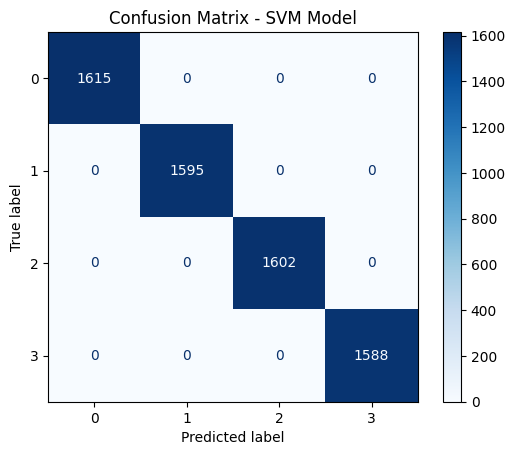

In [107]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - SVM Model")
plt.show()

In [111]:
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    classification_report
)

# Ground truth
y_true = solution_df["Fault_Encoded"]


models_pred = {
    "Random Forest": "Prediction_randomForest",
    "XGBoost": "Prediction_XGBoost",
    "SVM": "Prediction_SVM",
    "KNN": "Prediction_KNN"
}

for name, col in models_pred.items():
    print("="*70)
    print(f"                 EVALUATION METRICS - {name}")
    print("="*70)
    
    y_pred = solution_df[col]

  
    precision = precision_score(y_true, y_pred, average='weighted')
    recall    = recall_score(y_true, y_pred, average='weighted')
    f1        = f1_score(y_true, y_pred, average='weighted')

    print(f"Precision : {precision:.6f}")
    print(f"Recall    : {recall:.6f}")
    print(f"F1-Score  : {f1:.6f}")
    print("\n--- Classification Report ---")
    print(classification_report(y_true, y_pred))
    print("\n\n")


                 EVALUATION METRICS - Random Forest
Precision : 0.999844
Recall    : 0.999844
F1-Score  : 0.999844

--- Classification Report ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1615
           1       1.00      1.00      1.00      1595
           2       1.00      1.00      1.00      1602
           3       1.00      1.00      1.00      1588

    accuracy                           1.00      6400
   macro avg       1.00      1.00      1.00      6400
weighted avg       1.00      1.00      1.00      6400




                 EVALUATION METRICS - XGBoost
Precision : 0.999844
Recall    : 0.999844
F1-Score  : 0.999844

--- Classification Report ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1615
           1       1.00      1.00      1.00      1595
           2       1.00      1.00      1.00      1602
           3       1.00      1.00      1.00      1588

    